In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('/content/reviews.csv')
data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


Data cleaning

In [19]:
data.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [20]:
data = data.dropna()
data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [21]:
data.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84831 non-null  int64 
 1   id             84831 non-null  int64 
 2   date           84831 non-null  object
 3   reviewer_id    84831 non-null  int64 
 4   reviewer_name  84831 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


In [23]:
!pip install transformers requests beautifulsoup4 pandas numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [25]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [26]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [27]:
result = model(tokens)

In [28]:
result.logits


tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [29]:
int(torch.argmax(result.logits))+1

4

In [30]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [31]:
sentiment_score(data['comments'].iloc[1])

5

In [32]:
data['sentiment'] = data['comments'][:1000].apply(lambda x: sentiment_score(x[:512]))

<ipython-input-32-25679dd44a20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['comments'][:1000].apply(lambda x: sentiment_score(x[:512]))


In [33]:
data

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,5.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,5.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",4.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,5.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,5.0
...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,NaN
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,NaN
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",NaN
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",NaN


In [34]:
data = data.dropna()
data

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,5.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,5.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",4.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,5.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,5.0
...,...,...,...,...,...,...,...
995,1707064,51046100,2015-10-17,27275711,Emily,Cory and Amanda were wonderful hosts! The chec...,5.0
996,1707064,51922162,2015-10-25,6770493,Agnieszka,My friend and I came to Seattle for a birthday...,4.0
997,1707064,52525277,2015-10-30,6210581,Ed,Cory and Amanda's place was wonderful! Located...,5.0
998,1707064,53439038,2015-11-08,1101965,Lesli,We had an amazing stay with Cory and Amanda! ...,5.0


In [35]:
data['comments'][:1]

0    Cute and cozy place. Perfect location to every...
Name: comments, dtype: object

Onehot encoding

In [36]:
text = data['comments'].tolist()

In [37]:


# Create a vocabulary of all the unique words in the text
vocabulary = list(set([word for line in text for word in line.split()]))

# Create an empty dictionary to hold the one-hot encoding
one_hot_dict = {}

# Loop through the words in the vocabulary and set the binary values for each word in the text
for word in vocabulary:
    one_hot_dict[word] = []
    for line in text:
        if word in line:
            one_hot_dict[word].append(1)
        else:
            one_hot_dict[word].append(0)

# Create a Pandas DataFrame from the one-hot dictionary
df = pd.DataFrame.from_dict(one_hot_dict)

# Print the DataFrame
print(df)


     superfriendly  contained  old's  entertainment.  flexible.  Station,  \
0                0          0      0               0          0         0   
1                0          0      0               0          0         0   
2                0          0      0               0          0         0   
3                0          0      0               0          0         0   
4                0          0      0               0          0         0   
..             ...        ...    ...             ...        ...       ...   
995              0          0      0               0          0         0   
996              0          0      0               0          0         0   
997              0          0      0               0          0         0   
998              0          0      0               0          0         0   
999              0          0      0               0          0         0   

     Top  king-size  needed  Hello  ...  arrived,....and  Guests  Highland 

In [38]:
X = df.copy()
y = data['sentiment']

In [39]:
y.value_counts()

5.0    699
4.0    282
3.0     11
1.0      6
2.0      2
Name: sentiment, dtype: int64

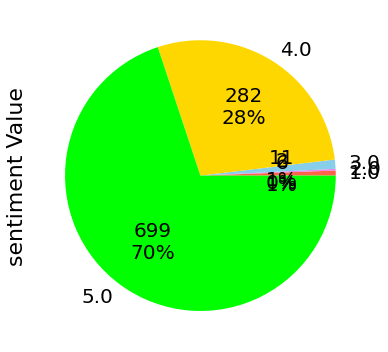

In [40]:

from matplotlib import pyplot as plt
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

data.groupby('sentiment').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'violet', 'skyblue','gold','lime'], ax=ax1)
ax1.set_ylabel('sentiment Value', size=22)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=70)

In [42]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define the DNN architecture
model = keras.Sequential([
    # keras.layers.Flatten(input_shape=(0, 7575)),
    # keras.layers.Dense(60000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    # keras.layers.Dense(500, activation='relu'),
    # keras.layers.Dense(250, activation='relu'),
    # keras.layers.Dense(128, activation='relu'),
    # keras.layers.Dense(64, activation='relu'),
    # keras.layers.Dense(32, activation='relu'),
    # keras.layers.Dense(16, activation='relu'),
    # keras.layers.Dense(8, activation='relu'),
    # keras.layers.Dense(4, activation='relu'),
    # keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [43]:
# Train the model
history=model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=10, batch_size=82, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test.to_numpy(), y_test.to_numpy())
print('Test accuracy:', test_acc)

Epoch 1/10
10/10 [==============================] - 20s 2s/step - loss: -30061.8516 - accuracy: 0.0049 - val_loss: -225130.1719 - val_accuracy: 0.0222
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: -1928147.3750 - accuracy: 0.0049 - val_loss: -6804379.5000 - val_accuracy: 0.0222
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: -24906768.0000 - accuracy: 0.0049 - val_loss: -64851164.0000 - val_accuracy: 0.0222
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: -167724448.0000 - accuracy: 0.0049 - val_loss: -365690400.0000 - val_accuracy: 0.0222
Epoch 5/10
10/10 [==============================] - 15s 1s/step - loss: -778772928.0000 - accuracy: 0.0049 - val_loss: -1502673536.0000 - val_accuracy: 0.0222
Epoch 6/10
10/10 [==============================] - 16s 2s/step - loss: -2841992448.0000 - accuracy: 0.0049 - val_loss: -4961256448.0000 - val_accuracy: 0.0222
Epoch 7/10
10/10 [==============================] - 15s 1s/ste

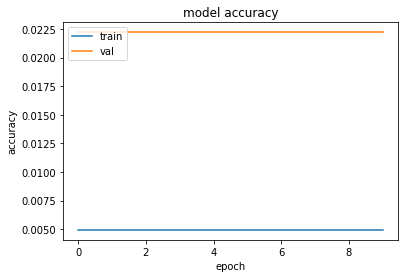

In [44]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

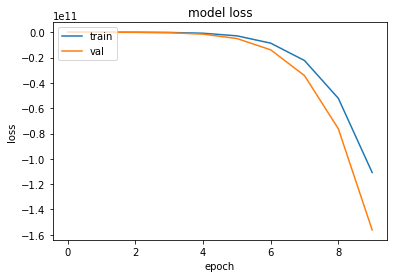

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()